## KNN 

In [1]:
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

iris_dataset = load_iris()

In [2]:
## Iris 데이터의 description
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print('iris dataset의 키:\n', iris_dataset.keys() )

iris dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print('특징의 이름:\n', iris_dataset.feature_names)

특징의 이름:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print('타킷의 이름:\n', iris_dataset.target_names)

타킷의 이름:
 ['setosa' 'versicolor' 'virginica']


In [6]:
print('data의 타입: ', type(iris_dataset.data))

data의 타입:  <class 'numpy.ndarray'>


In [7]:
print('data의 크기: ', iris_dataset.data.shape)

data의 크기:  (150, 4)


In [8]:
print('data의 처음 5개:\n ', iris_dataset.data[:5] ) 

data의 처음 5개:
  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
print('target의 타입: ', type(iris_dataset.target) ) 

target의 타입:  <class 'numpy.ndarray'>


In [10]:
print('target의 크기: ', iris_dataset.target.shape ) 

target의 크기:  (150,)


In [11]:
print('target:\n', iris_dataset.target)

target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 데이터 준비

In [12]:
from sklearn.model_selection import train_test_split

#### trainset, testset 분류

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, 
                                                    random_state= 0, 
                                                    test_size= 0.3)

# trainset
print('TRAINSET')
print('x_train 크기\t: ', X_train.shape)
print('y_train 크기\t: ', y_train.shape)

# testset
print('\nTESTSET')
print('x_test 크기\t: ' , X_test.shape)
print('y_test 크기\t: ' , y_test.shape)

TRAINSET
x_train 크기	:  (105, 4)
y_train 크기	:  (105,)

TESTSET
x_test 크기	:  (45, 4)
y_test 크기	:  (45,)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

In [15]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,2.0,3.5,1.0
1,6.5,3.0,5.5,1.8
2,6.7,3.3,5.7,2.5
3,6.0,2.2,5.0,1.5
4,6.7,2.5,5.8,1.8


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

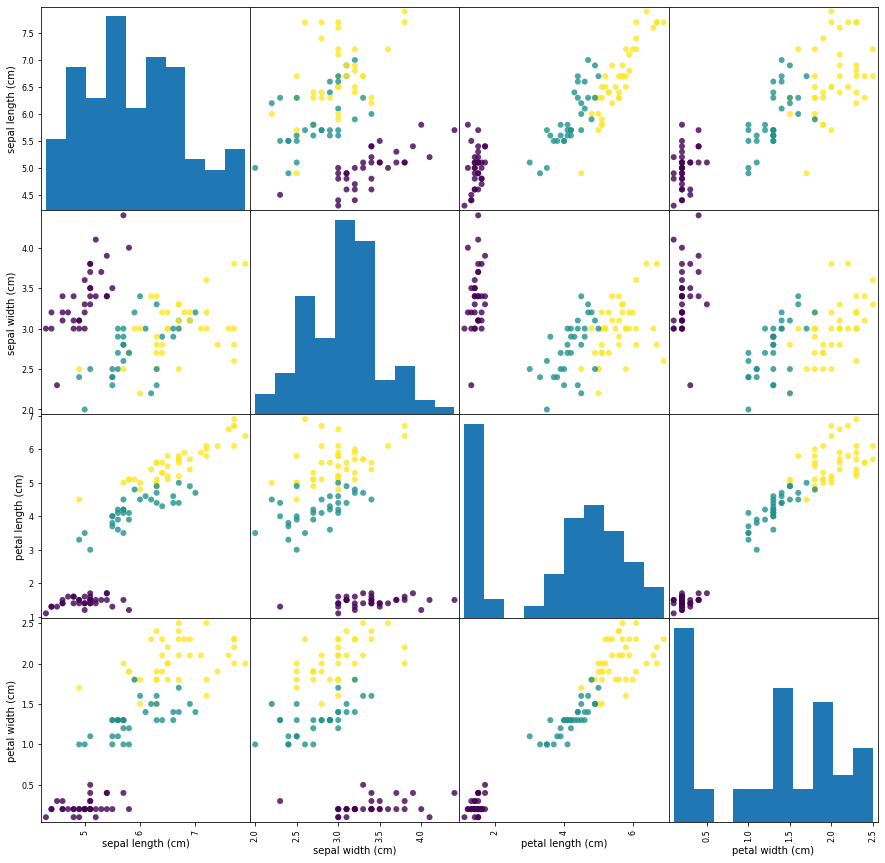

In [16]:
pd.plotting.scatter_matrix(iris_dataframe, figsize=(15,15), 
                           marker='o', 
                           c= y_train,
                           cmap='viridis',
                           alpha= 0.8
                          )

## 첫번째 머신러닝 모델: k-nn 알고리즘 ( k-최근접 )

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)

#### fit

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 예측하기

In [19]:
import numpy as np

X_new = np.array( [[5.2, 9, 1, 0.2]] ) # 에측용 샘플 데이터
prediction = knn.predict(X_new)

print('예측: ', prediction)
print('예측한 타깃의 이름: ', iris_dataset.target_names[prediction])

예측:  [0]
예측한 타깃의 이름:  ['setosa']


### 모델의 평가

In [20]:
y_pred = knn.predict(X_test)
print('테스트 세트에 대한 예측값"\n', y_pred)

테스트 세트에 대한 예측값"
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [21]:
# 정확도 
print('테스트 세트에 대한 정확도: {}%'.format(round(np.mean(y_pred == y_test)*100, 2) ))

테스트 세트에 대한 정확도: 97.78%


In [22]:
print('테스트 세트에 대한 정확도: {}%'.format(knn.score(X_test,y_test)) ) 

테스트 세트에 대한 정확도: 0.9777777777777777%
